In [55]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [56]:
df = pd.read_csv('Social_Network.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [57]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [58]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [59]:
df.dropna(inplace= True)

In [60]:
df.drop_duplicates(inplace= True)

In [61]:
df.shape

(400, 5)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [63]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [64]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [65]:
df['Purchased'].unique()

array([0, 1], dtype=int64)

In [66]:
p = 143/257

In [67]:
df['log_odds1'] = np.log(p/(1-p))
df


,User ID,Gender,Age,EstimatedSalary,Purchased,log_odds1
0,15624510,Male,19,19000,0,0.226646
1,15810944,Male,35,20000,0,0.226646
2,15668575,Female,26,43000,0,0.226646
3,15603246,Female,27,57000,0,0.226646
4,15804002,Male,19,76000,0,0.226646
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0.226646
396,15706071,Male,51,23000,1,0.226646
397,15654296,Female,50,20000,1,0.226646
398,15755018,Male,36,33000,0,0.226646


In [68]:
df['probability1'] = (np.exp(df['log_odds1']))/(1+ np.exp(df['log_odds1']))
df

,User ID,Gender,Age,EstimatedSalary,Purchased,log_odds1,probability1
0,15624510,Male,19,19000,0,0.226646,0.55642
1,15810944,Male,35,20000,0,0.226646,0.55642
2,15668575,Female,26,43000,0,0.226646,0.55642
3,15603246,Female,27,57000,0,0.226646,0.55642
4,15804002,Male,19,76000,0,0.226646,0.55642
...,...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0.226646,0.55642
396,15706071,Male,51,23000,1,0.226646,0.55642
397,15654296,Female,50,20000,1,0.226646,0.55642
398,15755018,Male,36,33000,0,0.226646,0.55642


In [69]:
df['Residual1'] = df['Purchased'] - df['probability1']
df

,User ID,Gender,Age,EstimatedSalary,Purchased,log_odds1,probability1,Residual1
0,15624510,Male,19,19000,0,0.226646,0.55642,-0.55642
1,15810944,Male,35,20000,0,0.226646,0.55642,-0.55642
2,15668575,Female,26,43000,0,0.226646,0.55642,-0.55642
3,15603246,Female,27,57000,0,0.226646,0.55642,-0.55642
4,15804002,Male,19,76000,0,0.226646,0.55642,-0.55642
...,...,...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0.226646,0.55642,0.44358
396,15706071,Male,51,23000,1,0.226646,0.55642,0.44358
397,15654296,Female,50,20000,1,0.226646,0.55642,0.44358
398,15755018,Male,36,33000,0,0.226646,0.55642,-0.55642


In [70]:
df['Gender'] = df['Gender'].replace({'Male':0, 'Female':1})
X = df.iloc[:, 0:4].values
Y = df.iloc[:,-1].values

C:\Users\AL-HAMD\AppData\Local\Temp\ipykernel_7896\2918916956.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male':0, 'Female':1})


In [71]:

dtc1 = DecisionTreeRegressor(max_leaf_nodes= 2, random_state=1)
dtc1.fit(X,Y)


DecisionTreeRegressor(max_leaf_nodes=2, random_state=1)

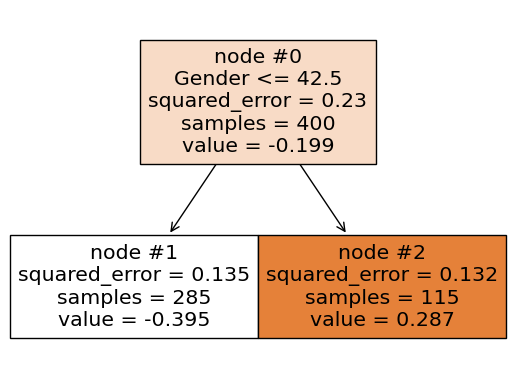

In [72]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(dtc1, feature_names=['User', 'ID',	'Gender',	'Age',	'EstimatedSalary'], filled= True, node_ids=True)
plt.show()

In [73]:
df['leaf_node1'] = dtc1.apply(df.iloc[:, 0:4])
df

c:\Users\AL-HAMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,User ID,Gender,Age,EstimatedSalary,Purchased,log_odds1,probability1,Residual1,leaf_node1
0,15624510,0,19,19000,0,0.226646,0.55642,-0.55642,1
1,15810944,0,35,20000,0,0.226646,0.55642,-0.55642,1
2,15668575,1,26,43000,0,0.226646,0.55642,-0.55642,1
3,15603246,1,27,57000,0,0.226646,0.55642,-0.55642,1
4,15804002,0,19,76000,0,0.226646,0.55642,-0.55642,1
...,...,...,...,...,...,...,...,...,...
395,15691863,1,46,41000,1,0.226646,0.55642,0.44358,2
396,15706071,0,51,23000,1,0.226646,0.55642,0.44358,2
397,15654296,1,50,20000,1,0.226646,0.55642,0.44358,2
398,15755018,0,36,33000,0,0.226646,0.55642,-0.55642,1


In [74]:
def return_logs(leaf):
    numerator = df[df['leaf_node1'] == leaf]['Residual1'].sum()
    denominator = sum(df[df['leaf_node1'] == leaf]['probability1']* (1-df[df['leaf_node1'] == leaf]['probability1']))
    return numerator/denominator


In [75]:
df['log_odds2'] = df['log_odds1'] + df['leaf_node1'].apply(return_logs)
df

,User ID,Gender,Age,EstimatedSalary,Purchased,log_odds1,probability1,Residual1,leaf_node1,log_odds2
0,15624510,0,19,19000,0,0.226646,0.55642,-0.55642,1,-1.373799
1,15810944,0,35,20000,0,0.226646,0.55642,-0.55642,1,-1.373799
2,15668575,1,26,43000,0,0.226646,0.55642,-0.55642,1,-1.373799
3,15603246,1,27,57000,0,0.226646,0.55642,-0.55642,1,-1.373799
4,15804002,0,19,76000,0,0.226646,0.55642,-0.55642,1,-1.373799
...,...,...,...,...,...,...,...,...,...,...
395,15691863,1,46,41000,1,0.226646,0.55642,0.44358,2,1.389687
396,15706071,0,51,23000,1,0.226646,0.55642,0.44358,2,1.389687
397,15654296,1,50,20000,1,0.226646,0.55642,0.44358,2,1.389687
398,15755018,0,36,33000,0,0.226646,0.55642,-0.55642,1,-1.373799


In [76]:
df['probability2'] = (np.exp(-df['log_odds2']))/(1+np.exp(df['log_odds2']))
df

,User ID,Gender,Age,EstimatedSalary,Purchased,log_odds1,probability1,Residual1,leaf_node1,log_odds2,probability2
0,15624510,0,19,19000,0,0.226646,0.55642,-0.55642,1,-1.373799,3.152337
1,15810944,0,35,20000,0,0.226646,0.55642,-0.55642,1,-1.373799,3.152337
2,15668575,1,26,43000,0,0.226646,0.55642,-0.55642,1,-1.373799,3.152337
3,15603246,1,27,57000,0,0.226646,0.55642,-0.55642,1,-1.373799,3.152337
4,15804002,0,19,76000,0,0.226646,0.55642,-0.55642,1,-1.373799,3.152337
...,...,...,...,...,...,...,...,...,...,...,...
395,15691863,1,46,41000,1,0.226646,0.55642,0.44358,2,1.389687,0.049696
396,15706071,0,51,23000,1,0.226646,0.55642,0.44358,2,1.389687,0.049696
397,15654296,1,50,20000,1,0.226646,0.55642,0.44358,2,1.389687,0.049696
398,15755018,0,36,33000,0,0.226646,0.55642,-0.55642,1,-1.373799,3.152337


In [77]:
df['Residual2_error'] = df['Purchased'] - df['probability2']
df

,User ID,Gender,Age,EstimatedSalary,Purchased,log_odds1,probability1,Residual1,leaf_node1,log_odds2,probability2,Residual2_error
0,15624510,0,19,19000,0,0.226646,0.55642,-0.55642,1,-1.373799,3.152337,-3.152337
1,15810944,0,35,20000,0,0.226646,0.55642,-0.55642,1,-1.373799,3.152337,-3.152337
2,15668575,1,26,43000,0,0.226646,0.55642,-0.55642,1,-1.373799,3.152337,-3.152337
3,15603246,1,27,57000,0,0.226646,0.55642,-0.55642,1,-1.373799,3.152337,-3.152337
4,15804002,0,19,76000,0,0.226646,0.55642,-0.55642,1,-1.373799,3.152337,-3.152337
...,...,...,...,...,...,...,...,...,...,...,...,...
395,15691863,1,46,41000,1,0.226646,0.55642,0.44358,2,1.389687,0.049696,0.950304
396,15706071,0,51,23000,1,0.226646,0.55642,0.44358,2,1.389687,0.049696,0.950304
397,15654296,1,50,20000,1,0.226646,0.55642,0.44358,2,1.389687,0.049696,0.950304
398,15755018,0,36,33000,0,0.226646,0.55642,-0.55642,1,-1.373799,3.152337,-3.152337


In [78]:
dtc2 = DecisionTreeRegressor(max_leaf_nodes=2, random_state=1)
dtc2.fit(X,Y)

DecisionTreeRegressor(max_leaf_nodes=2, random_state=1)

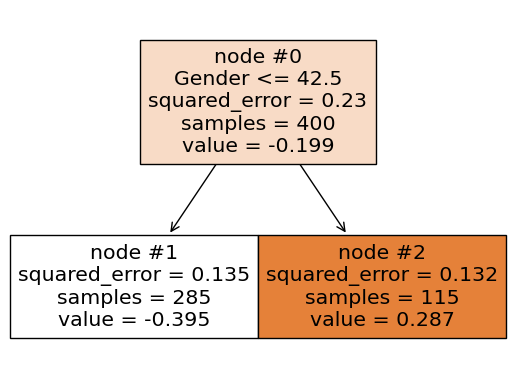

In [79]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(dtc1, feature_names=['User', 'ID',	'Gender',	'Age',	'EstimatedSalary'], filled= True, node_ids=True)
plt.show()

In [80]:
df['leaf_node2'] = dtc2.apply(df.iloc[:, 0:4])
df

c:\Users\AL-HAMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,User ID,Gender,Age,EstimatedSalary,Purchased,log_odds1,probability1,Residual1,leaf_node1,log_odds2,probability2,Residual2_error,leaf_node2
0,15624510,0,19,19000,0,0.226646,0.55642,-0.55642,1,-1.373799,3.152337,-3.152337,1
1,15810944,0,35,20000,0,0.226646,0.55642,-0.55642,1,-1.373799,3.152337,-3.152337,1
2,15668575,1,26,43000,0,0.226646,0.55642,-0.55642,1,-1.373799,3.152337,-3.152337,1
3,15603246,1,27,57000,0,0.226646,0.55642,-0.55642,1,-1.373799,3.152337,-3.152337,1
4,15804002,0,19,76000,0,0.226646,0.55642,-0.55642,1,-1.373799,3.152337,-3.152337,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,15691863,1,46,41000,1,0.226646,0.55642,0.44358,2,1.389687,0.049696,0.950304,2
396,15706071,0,51,23000,1,0.226646,0.55642,0.44358,2,1.389687,0.049696,0.950304,2
397,15654296,1,50,20000,1,0.226646,0.55642,0.44358,2,1.389687,0.049696,0.950304,2
398,15755018,0,36,33000,0,0.226646,0.55642,-0.55642,1,-1.373799,3.152337,-3.152337,1
